<a href="https://colab.research.google.com/github/slayerzeroa/Term_Project_23-2/blob/main/Term_Project_231117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader --q
!pip install yfinance --q
!pip install hmmlearn --q

In [ ]:
import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 날짜 설정
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2023, 1, 1)

# Yahoo Finance Overriding
yf.pdr_override()

In [ ]:
# 학습 타겟 설정
target = 'BTC-USD'

[*********************100%%**********************]  2 of 2 completed


<Axes: title={'center': 'Stock prices of the considered asset'}, xlabel='Date'>

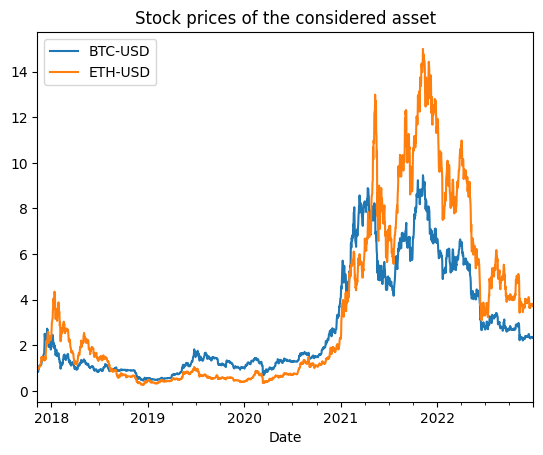

In [ ]:
# 위험자산 설정
RISKY_ASSETS = ['BTC-USD', 'ETH-USD']

# Yahoo Finance에서 데이터를 수집함 (기간: start ~ end)
df = pdr.get_data_yahoo(RISKY_ASSETS, start, end)
df.columns.set_levels(['adj_close', 'close', 'high', 'low', 'open', 'volume'],level=0,inplace=True)
df = df.dropna()

# 수정종가 # 스케일링
df_adj = df['adj_close']/df.adj_close.iloc[0]

# 그래프 그리기
df_adj.plot(title='Stock prices of the considered asset')

In [ ]:
df

adj_close                      close               \
                 BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2017-11-09   7143.580078   320.884003   7143.580078   320.884003   
2017-11-10   6618.140137   299.252991   6618.140137   299.252991   
2017-11-11   6357.600098   314.681000   6357.600098   314.681000   
2017-11-12   5950.069824   307.907990   5950.069824   307.907990   
2017-11-13   6559.490234   316.716003   6559.490234   316.716003   
...                  ...          ...           ...          ...   
2022-12-27  16717.173828  1212.791626  16717.173828  1212.791626   
2022-12-28  16552.572266  1189.986084  16552.572266  1189.986084   
2022-12-29  16642.341797  1201.595337  16642.341797  1201.595337   
2022-12-30  16602.585938  1199.232788  16602.585938  1199.232788   
2022-12-31  16547.496094  1196.771240  16547.496094  1196.771240   

                    high                        low               \
                 BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2017-11-09   7446.830078   329.451996   7101.520020   307.056000   
2017-11-10   7312.000000   324.717987   6436.870117   294.541992   
2017-11-11   6873.149902   319.453003   6204.220215   298.191986   
2017-11-12   6625.049805   319.153015   5519.009766   298.513000   
2017-11-13   6811.189941   328.415009   5844.290039   307.024994   
...                  ...          ...           ...          ...   
2022-12-27  16959.845703  1230.418091  16642.072266  1205.895630   
2022-12-28  16768.169922  1213.128906  16497.556641  1185.702148   
2022-12-29  16651.755859  1204.141602  16508.683594  1188.360229   
2022-12-30  16643.427734  1202.034668  16408.474609  1187.462524   
2022-12-31  16628.986328  1205.088623  16517.519531  1194.203735   

                    open                    volume                
                 BTC-USD      ETH-USD      BTC-USD       ETH-USD  
Date                                                              
2017-11-09   7446.830078   308.644989   3226249984  8.932500e+08  
2017-11-10   7173.729980   320.670990   5208249856  8.859860e+08  
2017-11-11   6618.609863   298.585999   4908680192  8.423010e+08  
2017-11-12   6295.450195   314.690002   8957349888  1.613480e+09  
2017-11-13   5938.250000   307.024994   6263249920  1.041890e+09  
...                  ...          ...          ...           ...  
2022-12-27  16919.291016  1226.987061  15748580239  4.091531e+09  
2022-12-28  16716.400391  1212.736572  17005713920  4.991670e+09  
2022-12-29  16552.322266  1190.010132  14472237479  4.132234e+09  
2022-12-30  16641.330078  1201.569580  15929162910  4.055668e+09  
2022-12-31  16603.673828  1199.360107  11239186456  3.018513e+09  

[1879 rows x 12 columns]

In [ ]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import plotly.graph_objects as go
from plotly.graph_objs.scatter.marker import Line
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import math

import warnings

warnings.filterwarnings('ignore')

In [ ]:
def prepare_input_data(prices, rolling_num):
    # 종목명
    ticker = prices.columns[0]
    # Moving Average, Log Return, MA Difference 계산
    prices[f'{ticker}_ma{rolling_num}'] = np.log(prices).rolling(rolling_num).mean()
    prices[f'{ticker}_log_return'] = np.log(prices[f'{ticker}_ma{rolling_num}']/prices[f'{ticker}_ma{rolling_num}'].shift(1)).dropna()
    prices[f'{ticker}_ma_diff'] = prices.iloc[:, 0].rolling(rolling_num).mean() - prices.iloc[:, 0].rolling(rolling_num+10).mean()
    # print(prices)

    prices.dropna(inplace = True)
    prices_array = np.array([[q] for q in prices[f'{ticker}_ma_diff'].values])

    return prices, prices_array

In [ ]:
prices, prices_array = prepare_input_data(df['adj_close'].iloc[:, 0].to_frame(), 20)

prices

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff
Date,,,,
2017-12-08,16569.400391,9.243351,0.004091,1213.018791
2017-12-09,15178.200195,9.275145,0.003434,1302.283618
2017-12-10,15455.400391,9.306832,0.003411,1370.446313
2017-12-11,16936.800781,9.343891,0.003974,1461.083341
2017-12-12,17415.400391,9.381227,0.003988,1536.998185
...,...,...,...,...
2022-12-27,16717.173828,9.741022,-0.000040,40.170280
2022-12-28,16552.572266,9.739006,-0.000207,-5.049837
2022-12-29,16642.341797,9.737553,-0.000149,-36.169010


In [ ]:
prices_array

array([[1213.01879069],
       [1302.28361816],
       [1370.44631348],
       ...,
       [ -36.16901042],
       [ -43.60992839],
       [ -57.45690104]])

In [ ]:
# prices.to_csv('BTC-USD.csv')

In [ ]:
class RegimeDetection:

    def get_regimes_hmm(self, input_data, params):
        hmm_model = self.initialise_model(GaussianHMM(), params).fit(input_data)
        return hmm_model

    def get_regimes_clustering(self, params):
        clustering =  self.initialise_model(AgglomerativeClustering(), params)
        return clustering

    def get_regimes_gmm(self, input_data, params):
        gmm = self.initialise_model(GaussianMixture(), params).fit(input_data)
        return gmm

    def initialise_model(self, model, params):
        for parameter, value in params.items():
            setattr(model, parameter, value)
        return model

In [ ]:
def plot_hidden_states(hidden_states, prices_df):

    '''
    Input:
    hidden_states(numpy.ndarray) - array of predicted hidden states
    prices_df(df) - dataframe of close prices

    Output:
    Graph showing hidden states and prices

    '''

    colors = ['blue', 'green']
    n_components = len(np.unique(hidden_states))
    fig = go.Figure()

    for i in range(n_components):
        mask = hidden_states == i
        print('Number of observations for State ', i,":", len(prices_df.index[mask]))

        fig.add_trace(go.Scatter(x=prices_df.index[mask], y=prices_df[f"{prices_df.columns[0]}"][mask],
                    mode='markers',  name='Hidden State ' + str(i), marker=dict(size=4,color=colors[i])))

    fig.update_layout(height=400, width=900, legend=dict(
            yanchor="top", y=0.99, xanchor="left",x=0.01), margin=dict(l=20, r=20, t=20, b=20)).show()

In [ ]:
regime_detection = RegimeDetection()

In [ ]:
print(len(prices))

1850


In [ ]:
params = {'n_clusters': 2, 'linkage': 'complete',  'metric': 'manhattan', 'metric': 'manhattan', 'random_state':100}
clustering = regime_detection.get_regimes_clustering(params)
clustering_states = clustering.fit_predict(prices_array)

plot_hidden_states(np.array(clustering_states), prices[[f'{target}']])

Number of observations for State  0 : 1744
Number of observations for State  1 : 106


In [ ]:
params = {'n_components':2, 'covariance_type': 'full', 'max_iter': 100000, 'n_init': 30,'init_params': 'kmeans', 'random_state':100}

gmm_model = regime_detection.get_regimes_gmm(prices_array, params)
gmm_states = gmm_model.predict(prices_array)
plot_hidden_states(np.array(gmm_states), prices[[f'{target}']])

Number of observations for State  0 : 470
Number of observations for State  1 : 1380


In [ ]:
params = {'n_components':2, 'covariance_type':"full", 'random_state':100}

hmm_model = regime_detection.get_regimes_hmm(prices_array, params)
hmm_states = hmm_model.predict(prices_array)
plot_hidden_states(np.array(hmm_states), prices[[f'{target}']])

Number of observations for State  0 : 575
Number of observations for State  1 : 1275


# Random Forest

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import google.colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# google drive 접근
label = pd.read_csv('/content/gdrive/Othercomputers/내 노트북/바탕 화면/SCHOOL LIFE/UNIVERSITY/과제쓰/4-1/인공지능기초/데이터/BTC-USD.csv', encoding='cp949')

# label = pd.read_csv('BTC-USD.csv', encoding='cp949')

In [ ]:
from datetime import datetime

label['Date'] = pd.to_datetime(label['Date'])

label[label['Date'] >= datetime(2017, 12 ,8)]['Label']

9       1
10      1
11      1
12      1
13      1
       ..
1854    0
1855    0
1856    0
1857    0
1858    0
Name: Label, Length: 1850, dtype: int64

In [ ]:
prices['Label'] = list(label[label['Date'] >= datetime(2017, 12, 8)]['Label'])

In [ ]:
prices

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label
Date,,,,,
2017-12-08,16569.400391,9.243351,0.004091,1213.018791,1
2017-12-09,15178.200195,9.275145,0.003434,1302.283618,1
2017-12-10,15455.400391,9.306832,0.003411,1370.446313,1
2017-12-11,16936.800781,9.343891,0.003974,1461.083341,1
2017-12-12,17415.400391,9.381227,0.003988,1536.998185,1
...,...,...,...,...,...
2022-12-27,16717.173828,9.741022,-0.000040,40.170280,0
2022-12-28,16552.572266,9.739006,-0.000207,-5.049837,0
2022-12-29,16642.341797,9.737553,-0.000149,-36.169010,0


In [ ]:
# Split the data into features (X) and target (y)
X = prices.drop('Label', axis=1)
y = prices['Label']

# Split the data into training and test sets


# Non - Shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6702702702702703


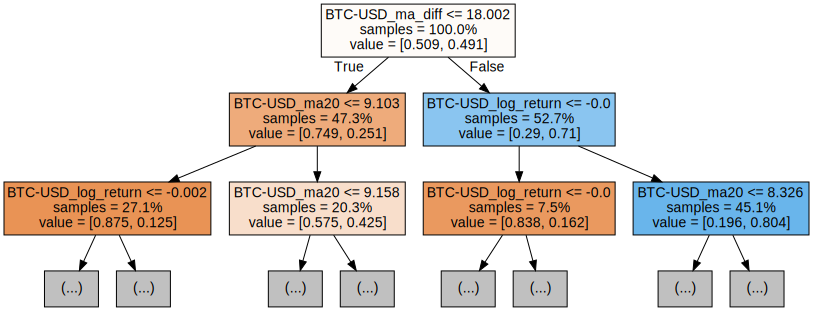

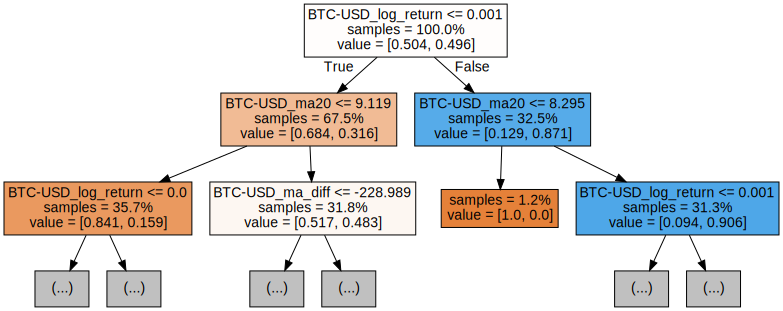

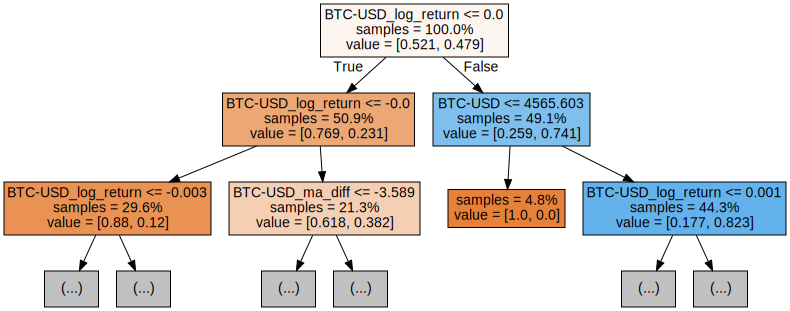

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
all_pred = rf.predict(X)

plot_hidden_states(np.array(all_pred), prices[[f'{target}']])

Number of observations for State  0 : 969
Number of observations for State  1 : 881


In [ ]:
# 라이브러리
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import os
from sklearn.tree import export_graphviz
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BTC-USD'),
  Text(1, 0, 'BTC-USD_ma20'),
  Text(2, 0, 'BTC-USD_log_return'),
  Text(3, 0, 'BTC-USD_ma_diff')])

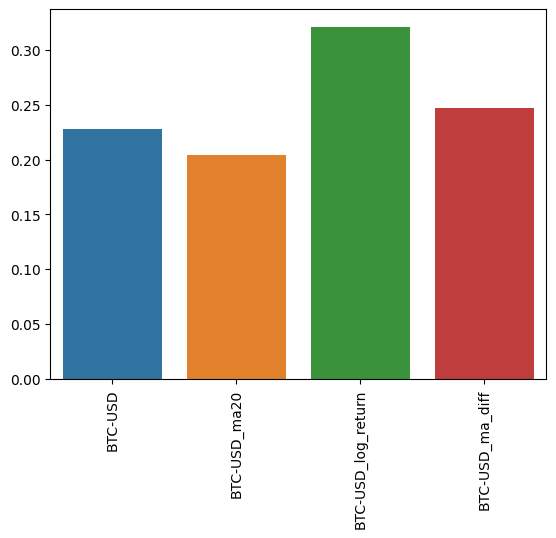

In [ ]:
# Features 중요도 시각화
sns.barplot(x = X.columns, y = rf.feature_importances_)
plt.xticks(rotation = 90)

In [ ]:
# Shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

all_pred = rf.predict(X)

plot_hidden_states(np.array(all_pred), prices[[f'{target}']])

Accuracy: 0.9333333333333333
Number of observations for State  0 : 1091
Number of observations for State  1 : 759


In [ ]:
# Shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

all_pred = rf.predict(X)

plot_hidden_states(np.array(all_pred), prices[[f'{target}']])

Accuracy: 0.6738738738738739
Number of observations for State  0 : 965
Number of observations for State  1 : 885


# LSTM

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)



In [ ]:
# google drive 접근

rf = pd.read_csv("/content/gdrive/Othercomputers/내 노트북/바탕 화면/SCHOOL LIFE/UNIVERSITY/과제쓰/4-1/인공지능기초/데이터/10rf.csv", skiprows=10)
bitcoin_supply = pd.read_csv("/content/gdrive/Othercomputers/내 노트북/바탕 화면/SCHOOL LIFE/UNIVERSITY/과제쓰/4-1/인공지능기초/데이터/bitcoin_supply.csv", skiprows=1)

# rf = pd.read_csv("10rf.csv", skiprows=10)
# bitcoin_supply = pd.read_csv("bitcoin_supply.csv", skiprows=1)

rf.columns = ['Date', 'Rate']
rf = rf.set_index('Date')


bitcoin_supply.columns = ['Date', 'Supply', 'Inflation']
bitcoin_supply = bitcoin_supply.set_index('Date')

rf.index = pd.to_datetime(rf.index)
bitcoin_supply.index = pd.to_datetime(bitcoin_supply.index)

In [ ]:
prices_1 = prices.join(bitcoin_supply, how='inner')
prices_1 = prices_1.join(rf, how='inner')

data = prices_1.dropna()

In [ ]:
X = data.drop(['Supply', 'BTC-USD', 'Label'], axis=1)

y = data['Label']

In [ ]:
# # scaling
# from sklearn.preprocessing import MinMaxScaler

# scaler_x = MinMaxScaler()

# scaler_x.fit(X.values)

# X_scale = scaler_x.transform(X.values)
# X_scale = pd.DataFrame(X_scale, columns=X.columns)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale[0], test_size=0.3, shuffle=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [ ]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

# 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)

X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# 텐서 형태로 데이터 정의
dataset = TensorDataset(X_train_tensor, y_train_tensor)

# 데이터 로더
dataloader = DataLoader(dataset,
                        batch_size=256,
                        shuffle=True,
                        drop_last=True)

In [ ]:
# 하이퍼파라미터
data_dim = 5
hidden_dim = 100
output_dim = 1
learning_rate = 0.000001
nb_epochs = 100
seq_length = len(X_train)

class Net(nn.Module):
    # # 기본변수, layer를 초기화해주는 생성자
    def __init__(self, input_dim, hidden_dim, seq_len, output_dim, layers):
        super(Net, self).__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.output_dim = output_dim
        self.layers = layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=layers,
                            # dropout = 0.1,
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim, bias = True)
        self.sigmoid = nn.Sigmoid()

    # 학습 초기화를 위한 함수
    def reset_hidden_state(self):
        self.hidden = (
                torch.zeros(self.layers, self.seq_len, self.hidden_dim),
                torch.zeros(self.layers, self.seq_len, self.hidden_dim))

    # 예측을 위한 함수
    def forward(self, x):
        x = torch.unsqueeze(x, 1)
        x, _status = self.lstm(x)
        x = self.fc(x[:, -1])
        x = self.sigmoid(x)
        return x

In [ ]:
def train_model(model, train_df, num_epochs = None, lr = None, verbose = 10, patience = 10):

    criterion = nn.MSELoss().to()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)
    nb_epochs = num_epochs

    # epoch마다 loss 저장
    train_hist = np.zeros(nb_epochs)

    for epoch in range(nb_epochs):
        avg_cost = 0
        total_batch = len(train_df)

        for batch_idx, samples in enumerate(train_df):

            x_train, y_train = samples

            # seq별 hidden state reset
            model.reset_hidden_state()

            # H(x) 계산
            outputs = model(x_train)

            # cost 계산
            loss = criterion(outputs, y_train)

            # cost로 H(x) 개선
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_cost += loss/total_batch

        train_hist[epoch] = avg_cost

        if epoch % verbose == 0:
            print('Epoch:', '%04d' % (epoch), 'train loss :', '{:.4f}'.format(avg_cost))

        # patience번째 마다 early stopping 여부 확인
        if (epoch % patience == 0) & (epoch != 0):

            # loss가 커졌다면 early stop
            if train_hist[epoch-patience] < train_hist[epoch]:
                print('\n Early Stopping')

                break

    return model.eval(), train_hist

In [ ]:
# 모델 학습
net = Net(data_dim, hidden_dim, seq_length, output_dim, 1).to()
model, train_hist = train_model(net, dataloader, num_epochs = nb_epochs, lr = learning_rate, verbose = 20, patience = 10)

Epoch: 0000 train loss : 0.2510

 Early Stopping


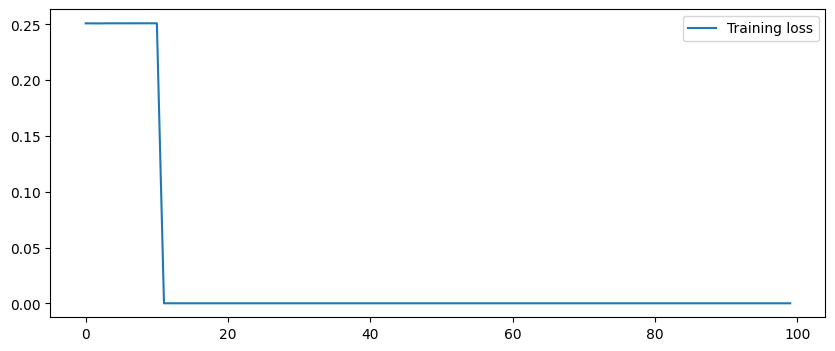

In [ ]:
# epoch별 손실값
fig = plt.figure(figsize=(10, 4))
plt.plot(train_hist, label="Training loss")
plt.legend()
plt.show()

In [ ]:
def step_function(number):
  if number > 0.5:
    number = 1
  else:
    number = 0
  return number

In [ ]:
prices_1 = prices.loc[X.index]

In [ ]:
prices_1

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label
Date,,,,,
2017-12-08,16569.400391,9.243351,0.004091,1213.018791,1
2017-12-11,16936.800781,9.343891,0.003974,1461.083341,1
2017-12-12,17415.400391,9.381227,0.003988,1536.998185,1
2017-12-13,16408.199219,9.416902,0.003796,1627.179346,1
2017-12-14,16564.000000,9.451730,0.003692,1711.753158,1
...,...,...,...,...,...
2022-12-23,16796.953125,9.743136,-0.000034,119.031608,0
2022-12-27,16717.173828,9.741022,-0.000040,40.170280,0
2022-12-28,16552.572266,9.739006,-0.000207,-5.049837,0


In [ ]:
# 예측 테스트
with torch.no_grad():
    pred = []
    for pr in X_train_tensor:

        model.reset_hidden_state()

        predicted = model(torch.unsqueeze(pr, 0))
        predicted = torch.flatten(predicted).item()
        pred.append(step_function(predicted))

    for pr in range(len(X_test_tensor)):

        model.reset_hidden_state()

        predicted = model(torch.unsqueeze(X_test_tensor[pr], 0))
        predicted = torch.flatten(predicted).item()
        pred.append(step_function(predicted))

# def MAE(true, pred):
#     return np.mean(np.abs(true-pred))

# print('MAE SCORE : ', MAE(pred, y_test))

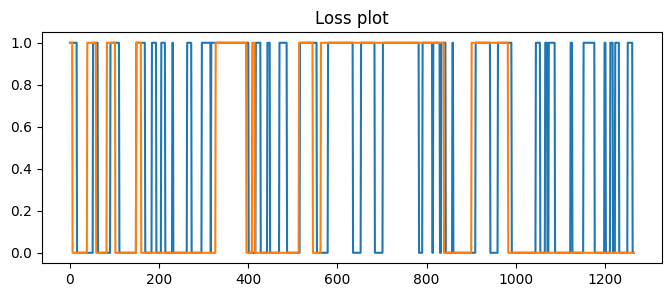

In [ ]:
fig = plt.figure(figsize=(8,3))
plt.plot(np.arange(len(pred)), pred, label = 'pred')
plt.plot(np.arange(len(list(y_train)+list(y_test))), list(y_train)+list(y_test), label = 'true')
plt.title("Loss plot")
plt.show()

In [ ]:
accuracy = accuracy_score(list(y_train) + list(y_test), pred)
print("Accuracy:", accuracy)

Accuracy: 0.7138339920948616


In [ ]:
plot_hidden_states(np.array(pred), prices_1[[f'{target}']])

Number of observations for State  0 : 623
Number of observations for State  1 : 642


#Lagged Data

In [ ]:
# shift 1 lagged 데이터 생성
prices_1 = prices.join(bitcoin_supply, how='inner')
prices_1 = prices_1.join(rf, how='inner')

data = prices_1.dropna()

prices_lagged = prices_1.shift(1)
prices_lagged.Label = prices_1.Label
prices_lagged = prices_lagged.dropna()
prices_lagged

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label,Supply,Inflation,Rate
Date,,,,,,,,
2017-12-11,16569.400391,9.243351,0.004091,1213.018791,1,16728889.80,4.255112,2.38
2017-12-12,16936.800781,9.343891,0.003974,1461.083341,1,16735252.30,4.662536,2.39
2017-12-13,17415.400391,9.381227,0.003988,1536.998185,1,16737202.30,4.252998,2.40
2017-12-14,16408.199219,9.416902,0.003796,1627.179346,1,16739527.30,5.070292,2.36
2017-12-15,16564.000000,9.451730,0.003692,1711.753158,1,16741839.80,5.042332,2.35
...,...,...,...,...,...,...,...,...
2022-12-23,16830.341797,9.743466,-0.000078,130.803971,0,19240989.79,1.600657,3.67
2022-12-26,16796.953125,9.743136,-0.000034,119.031608,0,19241814.79,1.565018,3.75
2022-12-28,16717.173828,9.741022,-0.000040,40.170280,0,19244777.29,1.363245,3.84


In [ ]:
X = prices_lagged.drop(['Supply', 'BTC-USD', 'Label'], axis=1)

y = prices_lagged['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

# 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)

X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# 텐서 형태로 데이터 정의
dataset = TensorDataset(X_train_tensor, y_train_tensor)

# 데이터 로더
dataloader = DataLoader(dataset,
                        batch_size=256,
                        shuffle=True,
                        drop_last=True)

In [ ]:
# 모델 학습
net = Net(data_dim, hidden_dim, seq_length, output_dim, 1).to()
model, train_hist = train_model(net, dataloader, num_epochs = nb_epochs, lr = learning_rate, verbose = 1, patience = 10)

Epoch: 0000 train loss : 0.2506
Epoch: 0001 train loss : 0.2503
Epoch: 0002 train loss : 0.2508
Epoch: 0003 train loss : 0.2499
Epoch: 0004 train loss : 0.2501
Epoch: 0005 train loss : 0.2497
Epoch: 0006 train loss : 0.2504
Epoch: 0007 train loss : 0.2505
Epoch: 0008 train loss : 0.2504
Epoch: 0009 train loss : 0.2508
Epoch: 0010 train loss : 0.2502
Epoch: 0011 train loss : 0.2499
Epoch: 0012 train loss : 0.2504
Epoch: 0013 train loss : 0.2497
Epoch: 0014 train loss : 0.2503
Epoch: 0015 train loss : 0.2507
Epoch: 0016 train loss : 0.2501
Epoch: 0017 train loss : 0.2504
Epoch: 0018 train loss : 0.2499
Epoch: 0019 train loss : 0.2504
Epoch: 0020 train loss : 0.2502

 Early Stopping


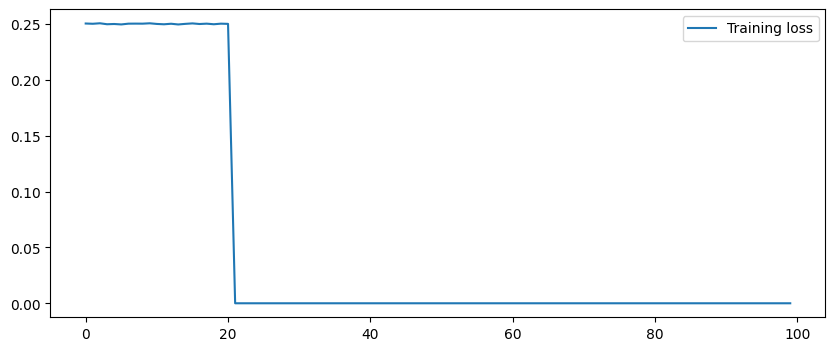

In [ ]:
# epoch별 손실값
fig = plt.figure(figsize=(10, 4))
plt.plot(train_hist, label="Training loss")
plt.legend()
plt.show()

In [ ]:
# 예측 테스트
with torch.no_grad():
    pred = []
    for pr in X_train_tensor:

        model.reset_hidden_state()

        predicted = model(torch.unsqueeze(pr, 0))
        predicted = torch.flatten(predicted).item()
        pred.append(step_function(predicted))

    for pr in range(len(X_test_tensor)):

        model.reset_hidden_state()

        predicted = model(torch.unsqueeze(X_test_tensor[pr], 0))
        predicted = torch.flatten(predicted).item()
        pred.append(step_function(predicted))

# def MAE(true, pred):
#     return np.mean(np.abs(true-pred))

# print('MAE SCORE : ', MAE(pred, y_test))

In [ ]:
accuracy = accuracy_score(list(y_test), pred[:len(y_test)])
print("Accuracy:", accuracy)

Accuracy: 0.16996047430830039


In [ ]:
plot_hidden_states(np.array(pred), prices_lagged[[f'{target}']])

Number of observations for State  0 : 190
Number of observations for State  1 : 1074


In [ ]:
print(len(prices_lagged[prices_lagged['Label']==0]))
print(len(prices_lagged[prices_lagged['Label']==1]))

746
518


In [ ]:
# shift 2 lagged 데이터 생성
prices_1 = prices.join(bitcoin_supply, how='inner')
prices_1 = prices_1.join(rf, how='inner')

data = prices_1.dropna()

prices_lagged = prices_1.shift(2)
prices_lagged.Label = prices_1.Label
prices_lagged = prices_lagged.dropna()
prices_lagged

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label,Supply,Inflation,Rate
Date,,,,,,,,
2017-12-12,16569.400391,9.243351,0.004091,1213.018791,1,16728889.80,4.255112,2.38
2017-12-13,16936.800781,9.343891,0.003974,1461.083341,1,16735252.30,4.662536,2.39
2017-12-14,17415.400391,9.381227,0.003988,1536.998185,1,16737202.30,4.252998,2.40
2017-12-15,16408.199219,9.416902,0.003796,1627.179346,1,16739527.30,5.070292,2.36
2017-12-18,16564.000000,9.451730,0.003692,1711.753158,0,16741839.80,5.042332,2.35
...,...,...,...,...,...,...,...,...
2022-12-23,16817.535156,9.744228,-0.000045,165.072298,0,19240146.04,1.695590,3.68
2022-12-26,16830.341797,9.743466,-0.000078,130.803971,0,19240989.79,1.600657,3.67
2022-12-27,16796.953125,9.743136,-0.000034,119.031608,0,19241814.79,1.565018,3.75


In [ ]:
X = prices_lagged.drop(['Supply', 'BTC-USD', 'Label'], axis=1)

y = prices_lagged['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

# 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)

X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# 텐서 형태로 데이터 정의
dataset = TensorDataset(X_train_tensor, y_train_tensor)

# 데이터 로더
dataloader = DataLoader(dataset,
                        batch_size=256,
                        shuffle=True,
                        drop_last=True)

In [ ]:
# 모델 학습
net = Net(data_dim, hidden_dim, seq_length, output_dim, 1).to()
model, train_hist = train_model(net, dataloader, num_epochs = nb_epochs, lr = learning_rate, verbose = 1, patience = 10)

Epoch: 0000 train loss : 0.2499
Epoch: 0001 train loss : 0.2513
Epoch: 0002 train loss : 0.2505
Epoch: 0003 train loss : 0.2505
Epoch: 0004 train loss : 0.2505
Epoch: 0005 train loss : 0.2504
Epoch: 0006 train loss : 0.2507
Epoch: 0007 train loss : 0.2508
Epoch: 0008 train loss : 0.2498
Epoch: 0009 train loss : 0.2507
Epoch: 0010 train loss : 0.2505

 Early Stopping


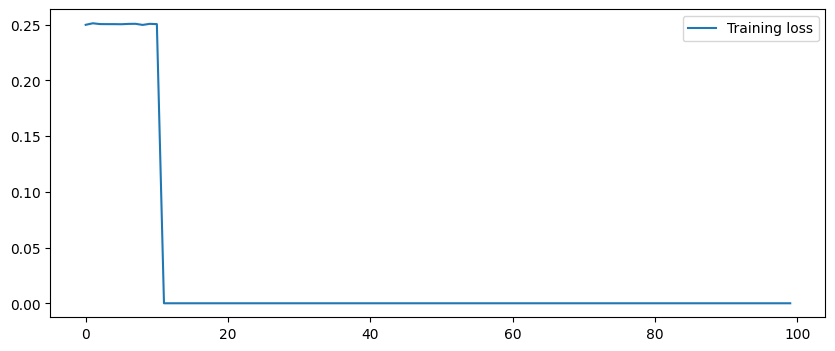

In [ ]:
# epoch별 손실값
fig = plt.figure(figsize=(10, 4))
plt.plot(train_hist, label="Training loss")
plt.legend()
plt.show()

In [ ]:
# 예측 테스트
with torch.no_grad():
    pred = []
    for pr in X_train_tensor:

        model.reset_hidden_state()

        predicted = model(torch.unsqueeze(pr, 0))
        predicted = torch.flatten(predicted).item()
        pred.append(step_function(predicted))

    for pr in range(len(X_test_tensor)):

        model.reset_hidden_state()

        predicted = model(torch.unsqueeze(X_test_tensor[pr], 0))
        predicted = torch.flatten(predicted).item()
        pred.append(step_function(predicted))

# def MAE(true, pred):
#     return np.mean(np.abs(true-pred))

# print('MAE SCORE : ', MAE(pred, y_test))

In [ ]:
accuracy = accuracy_score(list(y_test), pred[:len(y_test)])
print("Accuracy:", accuracy)

Accuracy: 0.5770750988142292


In [ ]:
plot_hidden_states(np.array(pred), prices_lagged[[f'{target}']])

Number of observations for State  0 : 584
Number of observations for State  1 : 679


# Backtest

In [ ]:
len(pred)
prices_lagged

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label,Supply,Inflation,Rate
Date,,,,,,,,
2017-12-12,16569.400391,9.243351,0.004091,1213.018791,1,16728889.80,4.255112,2.38
2017-12-13,16936.800781,9.343891,0.003974,1461.083341,1,16735252.30,4.662536,2.39
2017-12-14,17415.400391,9.381227,0.003988,1536.998185,1,16737202.30,4.252998,2.40
2017-12-15,16408.199219,9.416902,0.003796,1627.179346,1,16739527.30,5.070292,2.36
2017-12-18,16564.000000,9.451730,0.003692,1711.753158,0,16741839.80,5.042332,2.35
...,...,...,...,...,...,...,...,...
2022-12-23,16817.535156,9.744228,-0.000045,165.072298,0,19240146.04,1.695590,3.68
2022-12-26,16830.341797,9.743466,-0.000078,130.803971,0,19240989.79,1.600657,3.67
2022-12-27,16796.953125,9.743136,-0.000034,119.031608,0,19241814.79,1.565018,3.75


In [ ]:
prices_lagged['BTC-USD_return'] = np.exp(prices_lagged['BTC-USD_log_return'])-1

In [ ]:
prices_lagged

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label,Supply,Inflation,Rate,BTC-USD_return
Date,,,,,,,,,
2017-12-12,16569.400391,9.243351,0.004091,1213.018791,1,16728889.80,4.255112,2.38,0.004099
2017-12-13,16936.800781,9.343891,0.003974,1461.083341,1,16735252.30,4.662536,2.39,0.003982
2017-12-14,17415.400391,9.381227,0.003988,1536.998185,1,16737202.30,4.252998,2.40,0.003996
2017-12-15,16408.199219,9.416902,0.003796,1627.179346,1,16739527.30,5.070292,2.36,0.003803
2017-12-18,16564.000000,9.451730,0.003692,1711.753158,0,16741839.80,5.042332,2.35,0.003699
...,...,...,...,...,...,...,...,...,...
2022-12-23,16817.535156,9.744228,-0.000045,165.072298,0,19240146.04,1.695590,3.68,-0.000045
2022-12-26,16830.341797,9.743466,-0.000078,130.803971,0,19240989.79,1.600657,3.67,-0.000078
2022-12-27,16796.953125,9.743136,-0.000034,119.031608,0,19241814.79,1.565018,3.75,-0.000034


In [ ]:
carrying_return = np.cumprod(prices_lagged['BTC-USD_return']+1)[-1]-1
print(f'Carrying 누적 수익률: {carrying_return * 100}%')

Carrying 누적 수익률: 3.8861050246733475%


In [ ]:
prices_lagged['pred'] = pred

In [ ]:
import copy

In [ ]:
up = copy.deepcopy(prices_lagged[prices_lagged['pred'] == 0])
down = copy.deepcopy(prices_lagged[prices_lagged['pred'] == 1])

In [ ]:
up['BTC-USD_return'] = -up['BTC-USD_return']
up

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label,Supply,Inflation,Rate,BTC-USD_return,pred
Date,,,,,,,,,,
2018-01-08,15599.200195,9.648739,-0.000657,-277.698372,0,16782702.30,4.567774,2.46,0.000656,0
2018-01-09,17429.500000,9.643133,-0.000581,-485.693392,0,16784489.80,3.887559,2.47,0.000581,0
2018-01-10,15170.099609,9.623380,-0.000823,-812.790039,0,16790689.80,4.511242,2.49,0.000823,0
2018-01-11,14595.400391,9.616871,-0.000677,-885.583333,0,16792739.80,4.456339,2.55,0.000676,0
2018-01-12,14973.299805,9.614175,-0.000280,-861.613330,0,16794814.80,4.510134,2.55,0.000280,0
...,...,...,...,...,...,...,...,...,...,...
2022-12-06,17088.660156,9.715239,0.000088,-809.984977,0,19222827.29,1.483485,3.51,-0.000088,0
2022-12-07,16974.826172,9.718691,0.000027,-364.571045,0,19225433.54,1.732488,3.60,-0.000027,0
2022-12-08,17089.503906,9.719936,0.000128,-215.668408,0,19226277.29,1.601882,3.51,-0.000128,0


In [ ]:
new_df = pd.concat([up, down])
new_df

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label,Supply,Inflation,Rate,BTC-USD_return,pred
Date,,,,,,,,,,
2018-01-08,15599.200195,9.648739,-0.000657,-277.698372,0,16782702.30,4.567774,2.46,0.000656,0
2018-01-09,17429.500000,9.643133,-0.000581,-485.693392,0,16784489.80,3.887559,2.47,0.000581,0
2018-01-10,15170.099609,9.623380,-0.000823,-812.790039,0,16790689.80,4.511242,2.49,0.000823,0
2018-01-11,14595.400391,9.616871,-0.000677,-885.583333,0,16792739.80,4.456339,2.55,0.000676,0
2018-01-12,14973.299805,9.614175,-0.000280,-861.613330,0,16794814.80,4.510134,2.55,0.000280,0
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,16906.304688,9.744670,-0.000079,206.893880,0,19239252.29,1.660093,3.69,-0.000079,1
2022-12-23,16817.535156,9.744228,-0.000045,165.072298,0,19240146.04,1.695590,3.68,-0.000045,1
2022-12-26,16830.341797,9.743466,-0.000078,130.803971,0,19240989.79,1.600657,3.67,-0.000078,1


In [ ]:
new_df = new_df.sort_index()

In [ ]:
lstm_return = np.cumprod(1+new_df['BTC-USD_return'])[-1]-1
print(f'LSTM 누적 수익률: {lstm_return * 100}%')

LSTM 누적 수익률: 104.91428871246478%
